# Problem Statement
We have a advertising dataset of a marketing agency. Goal is to develop a ML algorithm that predicts if a particular user will click on an advertisement. The dataset has 10 features:

'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' 'Clicked on Ad'.

'Clicked on Ad' is the categorical target feature, which has two possible values: 0 (user didn't click) and 1(user clicked).

# Importing Librraies and Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ad Click Data.csv')

In [5]:
df.shape

(1000, 10)

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


Dataset consists of 6 numeric columns and 4 catgorical columns

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,64.929524,15.844699,32.60,51.27,68.11,78.46,91.43
Age,1000.0,36.009000,8.785562,19.00,29.00,35.00,42.00,61.00
Area Income,987.0,54980.667234,13439.998510,13996.50,46947.57,57009.76,65479.35,79484.80
Daily Internet Usage,989.0,179.863620,43.870142,104.78,138.71,182.65,218.79,267.01
Male,997.0,0.480441,0.499868,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,1000.0,0.500000,0.500250,0.00,0.00,0.50,1.00,1.00


* We observe more than 1 hour is time spent on site
* Max age is 61 and minumum age is 19
* People of age 40-60 spend more time on ads

In [9]:
df.isnull().sum()

,0
Daily Time Spent on Site,13
Age,0
Area Income,13
Daily Internet Usage,11
Ad Topic Line,0
City,1
Male,3
Country,9
Timestamp,0
Clicked on Ad,0


Dataset has few null values

In [10]:

df[df.isnull().any(axis=1)]


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
18,54.70,36,31087.54,NaN,Grass-roots solution-oriented conglomeration,Jessicastad,1.0,British Indian Ocean Territory (Chagos Archipe...,2/13/2016 7:53,1
25,NaN,28,64828.00,204.79,Public-key foreground groupware,Port Danielleberg,1.0,Monaco,5/27/2016 15:25,0
32,59.05,57,NaN,169.23,Digitized global capability,North Richardburgh,1.0,Maldives,7/15/2016 5:05,1
33,55.60,23,30227.98,212.58,Multi-layered 4thgeneration knowledge user,NaN,0.0,Senegal,1/14/2016 14:00,1
36,62.26,53,56770.79,125.45,Profound stable product,West Aprilport,1.0,NaN,4/7/2016 15:18,1
39,NaN,39,27508.41,162.08,Intuitive exuding service-desk,Millerchester,0.0,Liberia,3/11/2016 6:49,1
46,69.62,20,NaN,202.25,Business-focused encompassing neural-net,New Sharon,1.0,Qatar,2/26/2016 22:46,0
63,NaN,32,61601.05,NaN,Focused upward-trending core,North Leonmouth,1.0,Bulgaria,3/31/2016 20:55,0
64,45.96,45,66281.46,141.22,Streamlined cohesive conglomeration,Robertfurt,0.0,NaN,6/3/2016 0:55,1
90,69.90,43,NaN,138.35,Down-sized modular intranet,Christopherport,0.0,Jersey,5/13/2016 11:51,1


Only 5% of the data has null values. We can directly drop them.

In [11]:

df.dropna(inplace=True)
df.shape


(953, 10)

In [12]:
# prompt: code for checking duplicates

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Display the duplicate rows (if any)
print(duplicate_rows)


Number of duplicate rows: 0
Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad]
Index: []


There is no duplicate values in the dataset

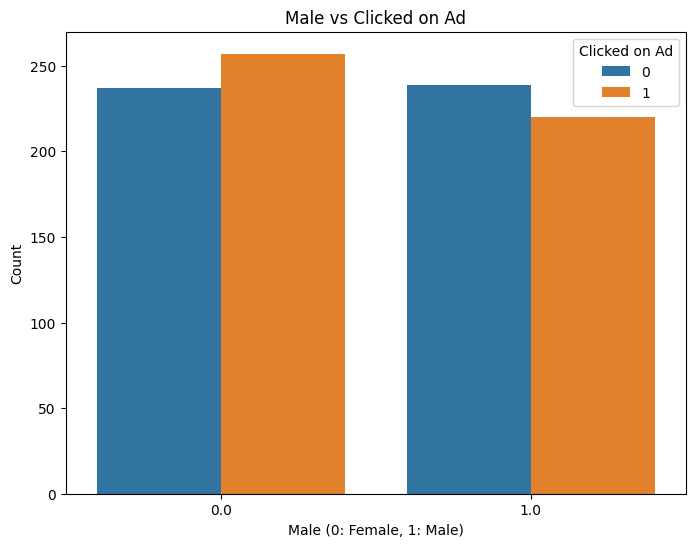

In [13]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Male', hue='Clicked on Ad', data=df)
plt.title('Male vs Clicked on Ad')
plt.xlabel('Male (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()


In [14]:

df.groupby(['Male', 'Clicked on Ad'])['Clicked on Ad'].count()


Male  Clicked on Ad
0.0   0                237
      1                257
1.0   0                239
      1                220
Name: Clicked on Ad, dtype: int64

In [15]:

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
Categorical columns: ['Ad Topic Line', 'City', 'Country', 'Timestamp']


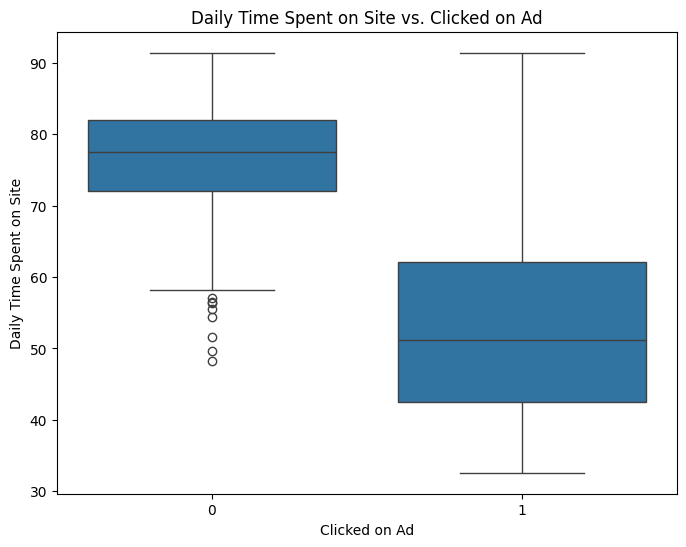

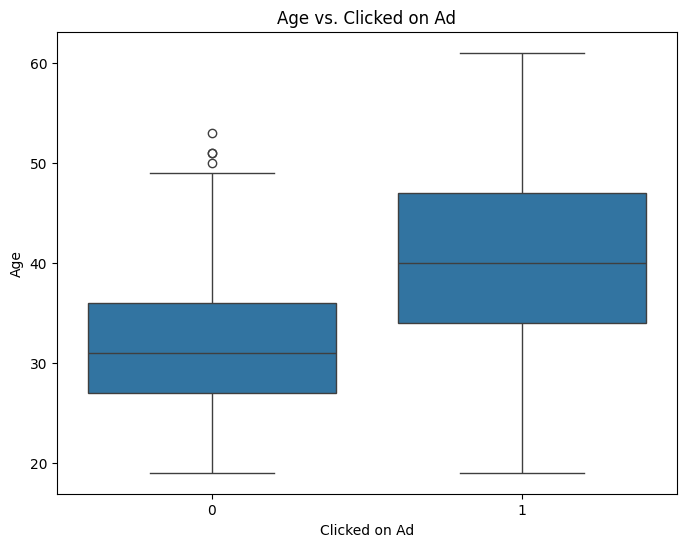

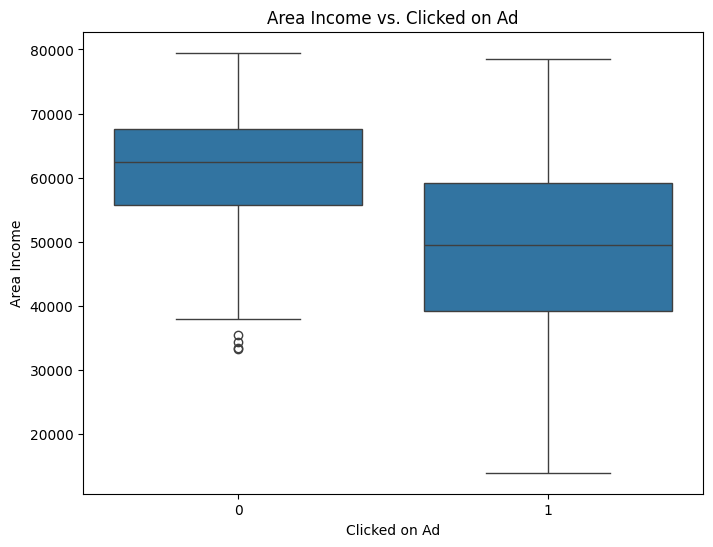

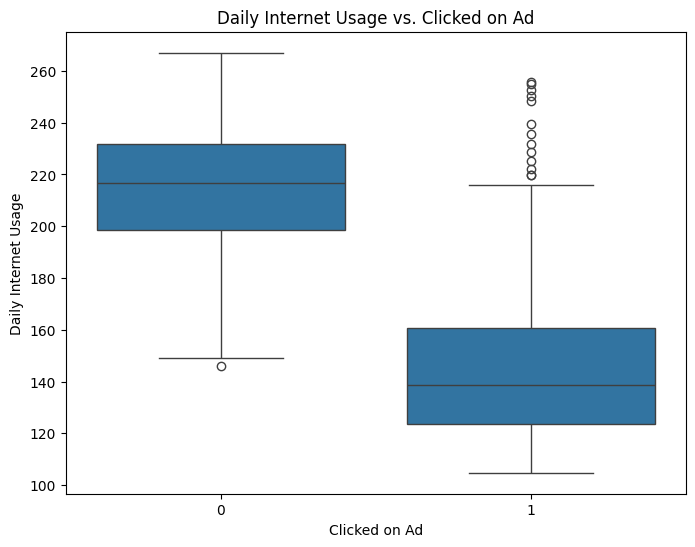

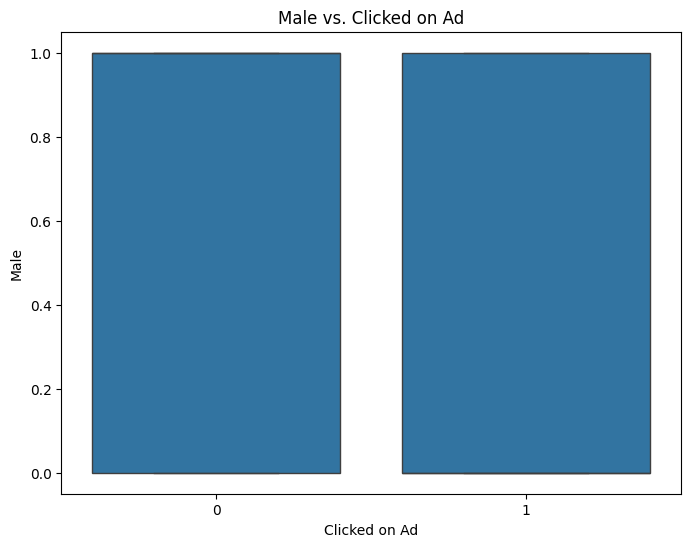

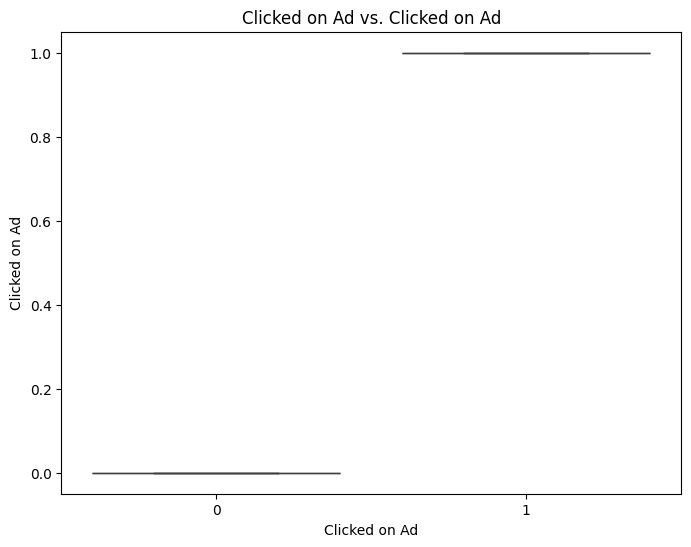

In [16]:

#numeric_cols.remove('Clicked on Ad')
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Clicked on Ad', y=col, data=df)
  plt.title(f'{col} vs. Clicked on Ad')
  plt.show()


In [17]:
# prompt: unique contry names

unique_countries = df['Country'].unique()
print(unique_countries)
print(len(unique_countries))

['Tunisia' 'Nauru' 'San Marino' 'Italy' 'Iceland' 'Norway' 'Myanmar'
 'Australia' 'Grenada' 'Ghana' 'Qatar' 'Burundi' 'Egypt'
 'Bosnia and Herzegovina' 'Barbados' 'Spain' 'Palestinian Territory'
 'Afghanistan' 'Russian Federation' 'Cameroon' 'Korea' 'Tokelau' 'Tuvalu'
 'Greece' 'British Virgin Islands' 'Bouvet Island (Bouvetoya)' 'Peru'
 'Aruba' 'Dominica' 'Luxembourg' 'Ukraine' 'Saint Helena' 'Turkmenistan'
 'Niger' 'Sri Lanka' 'Trinidad and Tobago' 'United Kingdom'
 'Guinea-Bissau' 'Micronesia' 'Turkey' 'Croatia' 'Israel'
 'Svalbard & Jan Mayen Islands' 'Azerbaijan' 'Iran'
 'Saint Vincent and the Grenadines' 'Canada' 'Rwanda'
 'Turks and Caicos Islands' 'Norfolk Island' 'Cook Islands' 'Guatemala'
 "Cote d'Ivoire" 'Faroe Islands' 'Ireland' 'Moldova' 'Nicaragua'
 'Montserrat' 'Timor-Leste' 'Puerto Rico' 'Central African Republic'
 'Venezuela' 'Wallis and Futuna' 'Samoa'
 'Antarctica (the territory South of 60 deg S)' 'Albania' 'Hong Kong'
 'Lithuania' 'Western Sahara' 'Serbia' 'Maldive

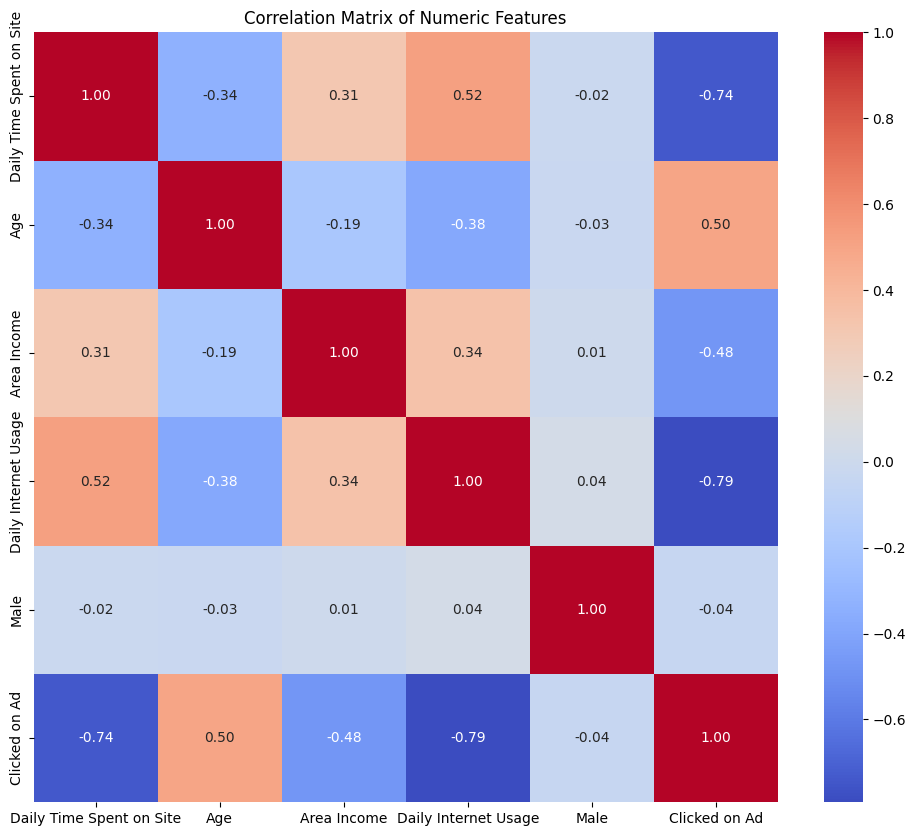

In [18]:

correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


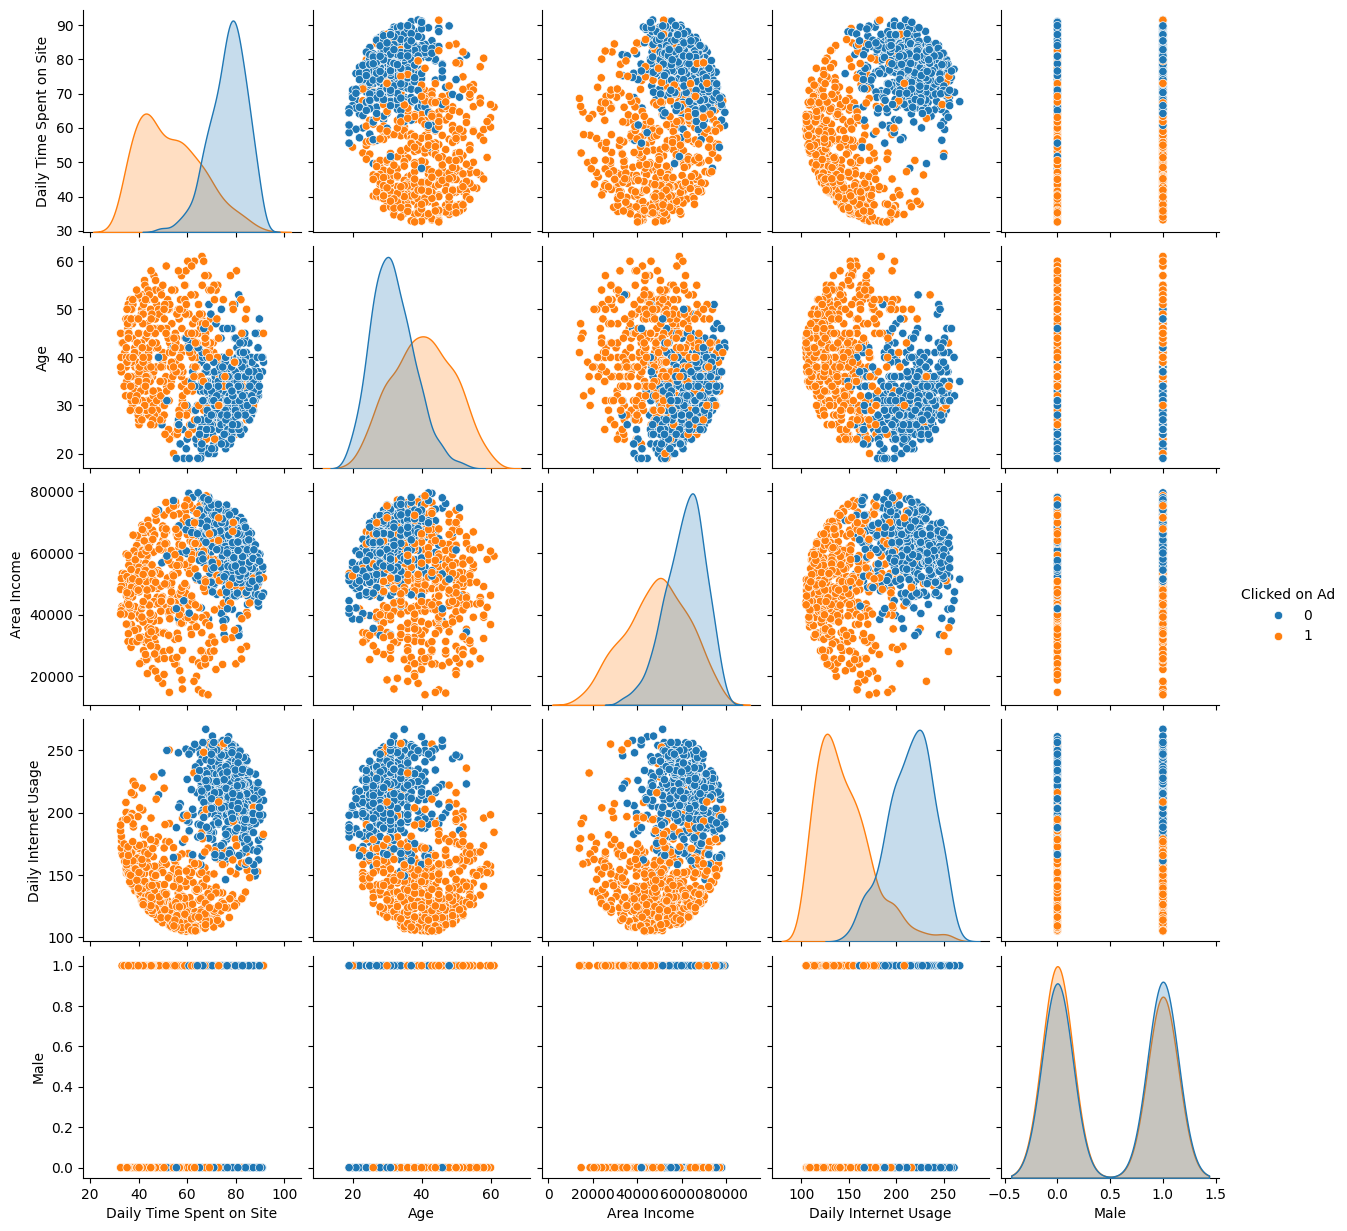

In [19]:

sns.pairplot(df, hue='Clicked on Ad')
plt.show()


# Modeling

In [20]:

from sklearn.model_selection import train_test_split

# Assuming 'Clicked on Ad' is your target variable
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can adjust the test_size and random_state as needed.


In [22]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (762, 9)
X_test shape: (191, 9)
y_train shape: (762,)
y_test shape: (191,)


In [21]:


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select only numerical features for the model
numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9790575916230366

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        95
           1       0.97      0.99      0.98        96

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191


Confusion Matrix:
[[92  3]
 [ 1 95]]


In [23]:
# prompt: logistic sm model

import statsmodels.api as sm

# Add a constant term to the independent variables
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_test_scaled_with_const = sm.add_constant(X_test_scaled)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_scaled_with_const).fit()

# Print the model summary
print(logit_model.summary())

# Make predictions on the test set
y_pred_logit = logit_model.predict(X_test_scaled_with_const)

# Convert predicted probabilities to class labels (e.g., 0 or 1) using a threshold
y_pred_logit_class = (y_pred_logit > 0.5).astype(int)

# Evaluate the model
accuracy_logit = accuracy_score(y_test, y_pred_logit_class)
print("Accuracy (Logit Model):", accuracy_logit)

print("\nClassification Report (Logit Model):")
print(classification_report(y_test, y_pred_logit_class))

print("\nConfusion Matrix (Logit Model):")
print(confusion_matrix(y_test, y_pred_logit_class))


Optimization terminated successfully.
         Current function value: 0.097938
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  762
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.8587
Time:                        16:41:58   Log-Likelihood:                -74.629
converged:                       True   LL-Null:                       -528.18
Covariance Type:            nonrobust   LLR p-value:                7.741e-194
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8991      0.368      5.165      0.000       1.178       2.620
x1            -2.9167      0

In [24]:

from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Naive Bayes Model):", accuracy_nb)

print("\nClassification Report (Naive Bayes Model):")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix (Naive Bayes Model):")
print(confusion_matrix(y_test, y_pred_nb))


Accuracy (Naive Bayes Model): 0.9738219895287958

Classification Report (Naive Bayes Model):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        95
           1       0.96      0.99      0.97        96

    accuracy                           0.97       191
   macro avg       0.97      0.97      0.97       191
weighted avg       0.97      0.97      0.97       191


Confusion Matrix (Naive Bayes Model):
[[91  4]
 [ 1 95]]


In [25]:

from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree Model):", accuracy_dt)

print("\nClassification Report (Decision Tree Model):")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Decision Tree Model):")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy (Decision Tree Model): 0.9528795811518325

Classification Report (Decision Tree Model):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        95
           1       0.94      0.97      0.95        96

    accuracy                           0.95       191
   macro avg       0.95      0.95      0.95       191
weighted avg       0.95      0.95      0.95       191


Confusion Matrix (Decision Tree Model):
[[89  6]
 [ 3 93]]
